# Jonathan Halverson
# Tuesday, October 17, 2017
# Full pipeline example

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
print digits['DESCR']

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
X, y = digits['data'], digits['target']

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

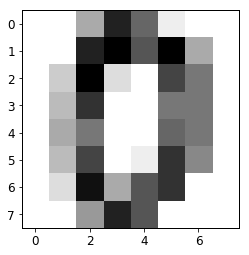

In [6]:
plt.imshow(X[0].reshape(8, 8), cmap=plt.cm.binary)

In [7]:
y[0]

0

Shuffle the data then perform a test train split:

In [17]:
rnd_idx = np.random.permutation(y.size)
X, y = X[rnd_idx], y[rnd_idx]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

We now wish to do two things. We want to use kernel PCA to reduce the number of dimensions even further and we want to find the optimal hyperparameters for a logistic regression classifier.

### I want to combine data preparation and cleaning with finding the optimal hyperparameters

In [23]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
pline = Pipeline([('std_sc', StandardScaler()),
                  ('kpca', KernelPCA(n_components=32)),
                  ('lr', LogisticRegression())])
param_grid = [{'kpca__kernel':['rbf', 'sigmoid'], 'kpca__gamma':[0.1, 1, 10],'lr__C':[0.01, 0.1, 1.0]}]

In [59]:
grid_search = GridSearchCV(pline, param_grid, cv=5, refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('std_sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=32, n_jobs=1,
     rando...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kpca__kernel': ['rbf', 'sigmoid'], 'kpca__gamma': [0.1, 1, 10], 'lr__C': [0.01, 0.1, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
grid_search.predict(X_test)

array([4, 5, 8, 7, 8, 1, 7, 5, 1, 4, 5, 1, 4, 8, 8, 0, 6, 4, 8, 6, 2, 2, 2,
       5, 7, 5, 0, 5, 7, 9, 3, 7, 3, 5, 9, 8, 8, 4, 6, 6, 5, 0, 4, 4, 7, 5,
       8, 1, 4, 2, 7, 1, 8, 5, 9, 8, 0, 4, 5, 1, 5, 3, 2, 1, 1, 3, 0, 3, 0,
       5, 3, 7, 7, 3, 0, 4, 9, 1, 3, 1, 7, 8, 3, 9, 3, 9, 0, 4, 0, 8, 6, 9,
       1, 5, 2, 8, 7, 1, 4, 8, 4, 1, 6, 7, 1, 6, 1, 5, 4, 1, 6, 1, 9, 3, 5,
       2, 5, 4, 9, 2, 0, 4, 7, 0, 2, 7, 7, 0, 6, 2, 0, 2, 4, 1, 1, 5, 6, 4,
       8, 2, 3, 1, 4, 8, 2, 2, 8, 5, 6, 7, 9, 6, 1, 4, 1, 7, 2, 5, 4, 5, 3,
       3, 0, 7, 9, 4, 2, 1, 3, 8, 7, 2, 8, 5, 3, 5, 8, 6, 3, 5, 7, 2, 2, 9,
       4, 0, 6, 6, 4, 3, 3, 9, 0, 7, 9, 2, 5, 0, 2, 8, 6, 6, 3, 5, 4, 9, 1,
       9, 0, 2, 4, 4, 9, 4, 5, 2, 8, 3, 1, 4, 8, 6, 8, 5, 7, 2, 4, 5, 5, 2,
       2, 7, 4, 9, 6, 0, 1, 9, 5, 0, 4, 2, 0, 2, 0, 5, 8, 1, 6, 2, 3, 8, 1,
       9, 4, 3, 2, 9, 0, 2, 3, 1, 7, 7, 5, 7, 9, 3, 4, 5, 1, 3, 3, 1, 7, 4,
       6, 8, 3, 1, 6, 4, 8, 4, 0, 9, 4, 8, 4, 4, 9, 3, 4, 4, 7, 3, 3, 9, 7,
       1, 1,

In [78]:
grid_search.score(X_test, y_test)

0.93333333333333335

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, grid_search.predict(X_test))

0.93333333333333335

In [75]:
grid_search.best_estimator_.named_steps['std_sc'].mean_

array([  0.00000000e+00,   3.25678497e-01,   5.24077940e+00,
         1.18148921e+01,   1.17981907e+01,   5.71607516e+00,
         1.33542102e+00,   1.36395268e-01,   6.95894224e-03,
         2.00904662e+00,   1.03521225e+01,   1.19109255e+01,
         1.02727905e+01,   8.20668058e+00,   1.85247042e+00,
         1.18997912e-01,   3.47947112e-03,   2.62282533e+00,
         9.93110647e+00,   6.97425191e+00,   7.11343076e+00,
         7.85038274e+00,   1.85525400e+00,   5.70633264e-02,
         1.39178845e-03,   2.43215031e+00,   9.08420320e+00,
         8.77174669e+00,   9.93736952e+00,   7.57967989e+00,
         2.34933890e+00,   2.78357690e-03,   0.00000000e+00,
         2.31871955e+00,   7.57550452e+00,   8.92901879e+00,
         1.02101601e+01,   8.72303410e+00,   2.96590118e+00,
         0.00000000e+00,   6.26304802e-03,   1.57202505e+00,
         6.86638831e+00,   7.10090466e+00,   7.52609603e+00,
         8.22964509e+00,   3.55045233e+00,   3.20111343e-02,
         9.04662491e-03,

In [76]:
s = StandardScaler()
s.fit(X_train)
s.mean_

array([  0.00000000e+00,   3.25678497e-01,   5.24077940e+00,
         1.18148921e+01,   1.17981907e+01,   5.71607516e+00,
         1.33542102e+00,   1.36395268e-01,   6.95894224e-03,
         2.00904662e+00,   1.03521225e+01,   1.19109255e+01,
         1.02727905e+01,   8.20668058e+00,   1.85247042e+00,
         1.18997912e-01,   3.47947112e-03,   2.62282533e+00,
         9.93110647e+00,   6.97425191e+00,   7.11343076e+00,
         7.85038274e+00,   1.85525400e+00,   5.70633264e-02,
         1.39178845e-03,   2.43215031e+00,   9.08420320e+00,
         8.77174669e+00,   9.93736952e+00,   7.57967989e+00,
         2.34933890e+00,   2.78357690e-03,   0.00000000e+00,
         2.31871955e+00,   7.57550452e+00,   8.92901879e+00,
         1.02101601e+01,   8.72303410e+00,   2.96590118e+00,
         0.00000000e+00,   6.26304802e-03,   1.57202505e+00,
         6.86638831e+00,   7.10090466e+00,   7.52609603e+00,
         8.22964509e+00,   3.55045233e+00,   3.20111343e-02,
         9.04662491e-03,